# Import modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/n

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data preprocessing

In [6]:
df = df[['v2','v1']]
df = df.rename(columns={'v2':'messages','v1':'label'})
df.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [7]:
df.isnull().sum()

messages    0
label       0
dtype: int64

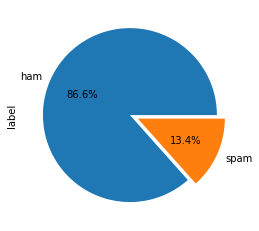

In [8]:
df['label'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%')

In [9]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [10]:
# clean the messages
df['clean_text'] = df['messages'].apply(clean_text)
df.head()

,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though


In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def w_cloud(df, title):
    comment_words = ''
    for val in df:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black', colormap='Set2',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plotting the WordCloud image                      
    pt.figure(figsize = (5, 5), facecolor = None)
    pt.imshow(wordcloud)
    pt.title(title)
    pt.axis("off")
    pt.tight_layout(pad = 0)

    pt.show()

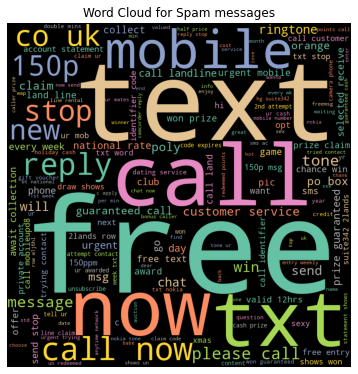

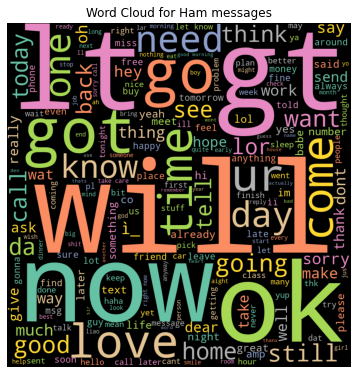

In [16]:
w_cloud(df[(df['label'] == "spam")].messages, 'Word Cloud for Spam messages')
w_cloud(df[(df['label'] == "ham")].messages, 'Word Cloud for Ham messages')

# Split data

In [17]:
X = df['clean_text']
y = df['label']

# Model Training

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
#     cv_score = cross_val_score(model, X, y, cv=5)
#     print("CV Score:", np.mean(cv_score)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))


# Naive Bayes classifier

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 96.69777458722182
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.75      0.86       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393



**Decision Tree Classifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 96.26704953338118
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1206
        spam       0.91      0.80      0.85       187

    accuracy                           0.96      1393
   macro avg       0.94      0.89      0.92      1393
weighted avg       0.96      0.96      0.96      1393



**Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 97.4156496769562
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1206
        spam       1.00      0.81      0.89       187

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



**SVC**

In [25]:
from sklearn.svm import SVC
model = SVC()
classify(model, X, y)

Accuracy: 97.91816223977028
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.84      0.92       187

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393

